### ASTR 3300/ PHYS 5300-003: Astrostatistics
***N. Pol***
___

# Homework 7
### Due: Friday, Apr. 4, at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [1]:
# install the relevant interactive plot packages
# only do this once
!pip install ipywidgets ipympl

C:\Users\kdcow\miniconda3\envs\astr3300\Lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


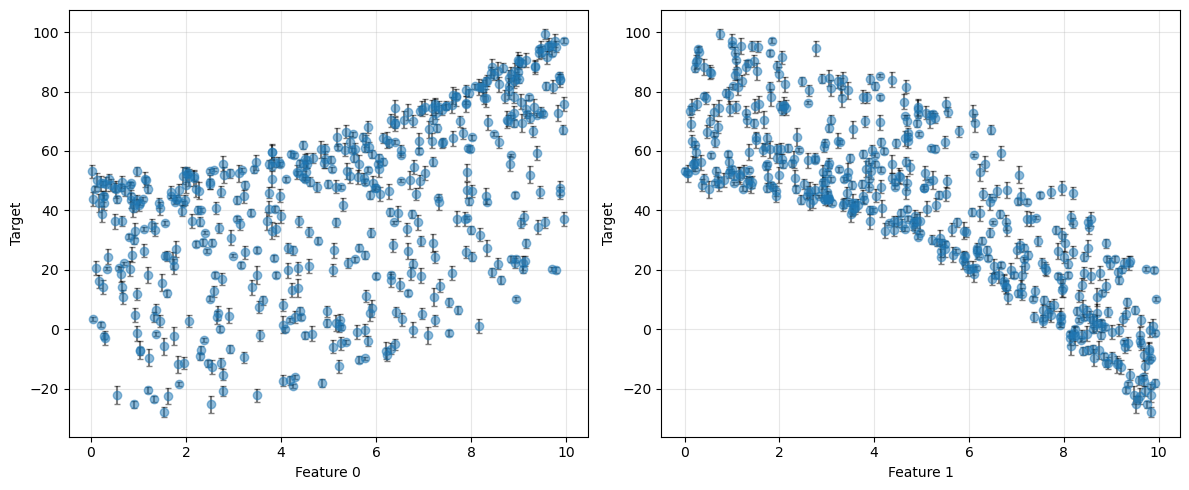

In [1]:
#Part 1
import numpy as np
import matplotlib.pyplot as plt
from astroML.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

data = np.load('./hw_data/hw7_data_1.npy')
X = data[:, :2]
y = data[:, 2]   
yerr = data[:, 3]  

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].errorbar(X[:, 0], y, yerr=yerr, fmt='o', alpha=0.5, ecolor='black', capsize=2)
axes[0].set_xlabel('Feature 0')
axes[0].set_ylabel('Target')
axes[0].grid(True, alpha=0.3)
axes[1].errorbar(X[:, 1], y, yerr=yerr, fmt='o', alpha=0.5, ecolor='black', capsize=2)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Target')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Intercept: 57.101023232995466
Slope for Feature 1: 4.948730161178383
Slope for Feature 2: -8.300234070064478


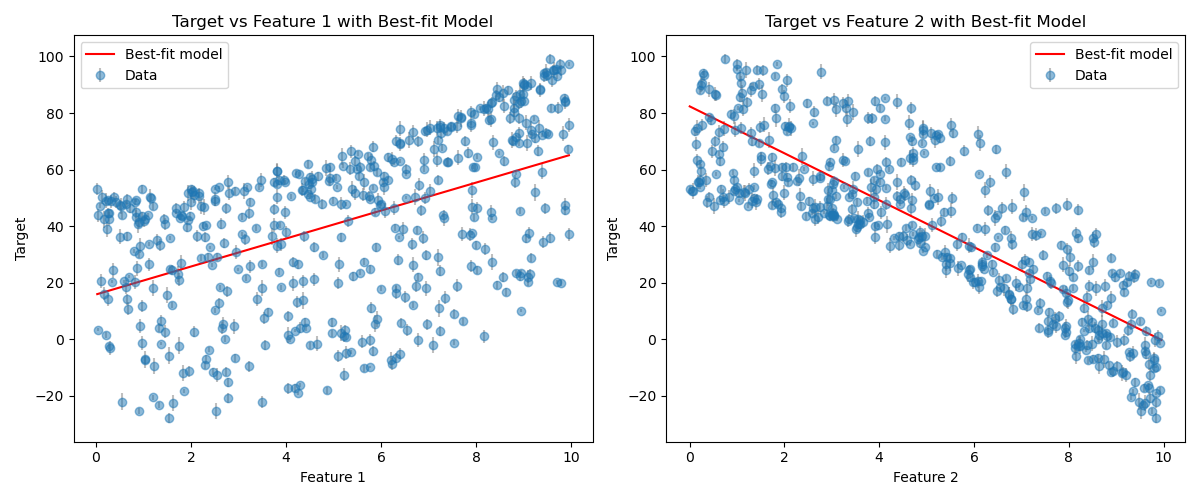

In [5]:
#Part 2
model = LinearRegression()
model.fit(X, y, y_error=yerr)

print(f"Intercept: {model.coef_[0]}")
print(f"Slope for Feature 1: {model.coef_[1]}")
print(f"Slope for Feature 2: {model.coef_[2]}")

feature1_min, feature1_max = X[:, 0].min(), X[:, 0].max()
feature2_min, feature2_max = X[:, 1].min(), X[:, 1].max()
feature1_grid = np.linspace(feature1_min, feature1_max, 50)
feature2_grid = np.linspace(feature2_min, feature2_max, 50)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].errorbar(X[:, 0], y, yerr=yerr, fmt='o', alpha=0.5, ecolor='gray', label='Data')
X_pred1 = np.column_stack((feature1_grid, np.ones(50) * np.mean(X[:, 1])))
y_pred1 = model.predict(X_pred1)
axes[0].plot(feature1_grid, y_pred1, 'r-', label='Best-fit model')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Target')
axes[0].set_title('Target vs Feature 1 with Best-fit Model')
axes[0].legend()

axes[1].errorbar(X[:, 1], y, yerr=yerr, fmt='o', alpha=0.5, ecolor='gray', label='Data')
X_pred2 = np.column_stack((np.ones(50) * np.mean(X[:, 0]), feature2_grid))
y_pred2 = model.predict(X_pred2)
axes[1].plot(feature2_grid, y_pred2, 'r-', label='Best-fit model')
axes[1].set_xlabel('Feature 2')
axes[1].set_ylabel('Target')
axes[1].set_title('Target vs Feature 2 with Best-fit Model')
axes[1].legend()

plt.tight_layout()
plt.show()

#It does look like a good description of the data. 

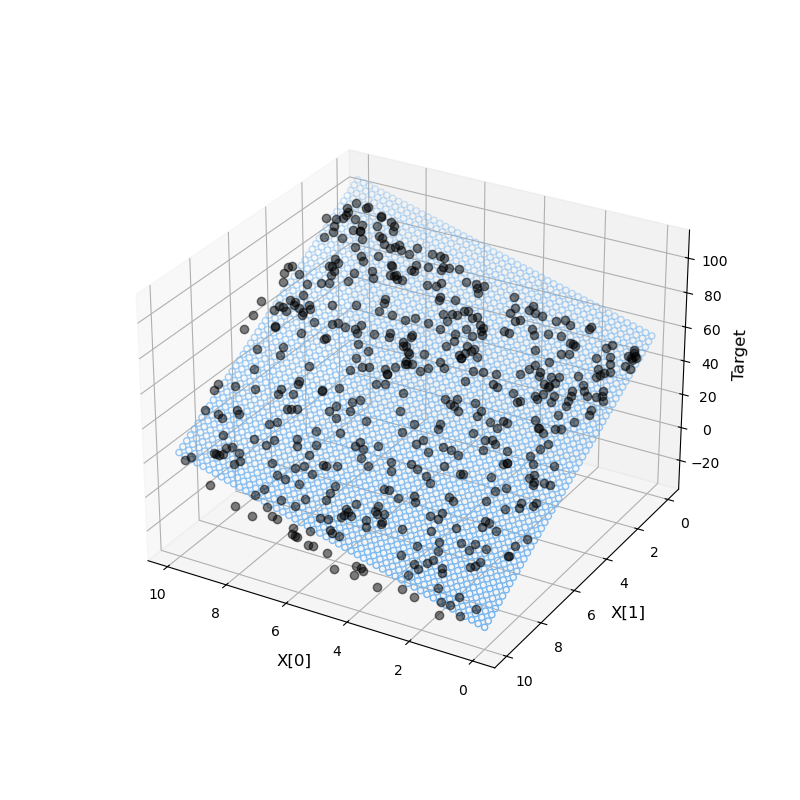

In [9]:
#Part 3

### always do this line at the start ### 
### of an interactive plotting cell
%matplotlib widget

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], y, color='k',
        zorder=15, linestyle='none',
        marker='o', alpha=0.5)
ax.scatter(feature1_mesh.flatten(), feature2_mesh.flatten(), y_grid.flatten(),
           facecolor=(0,0,0,0), s=20,
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.view_init(elev=28, azim=120)

plt.show()

%matplotlib inline


In [ ]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

Best parameters: {'alpha': 1.0, 'solver': 'lsqr'}
Best score: -59.17442154196484


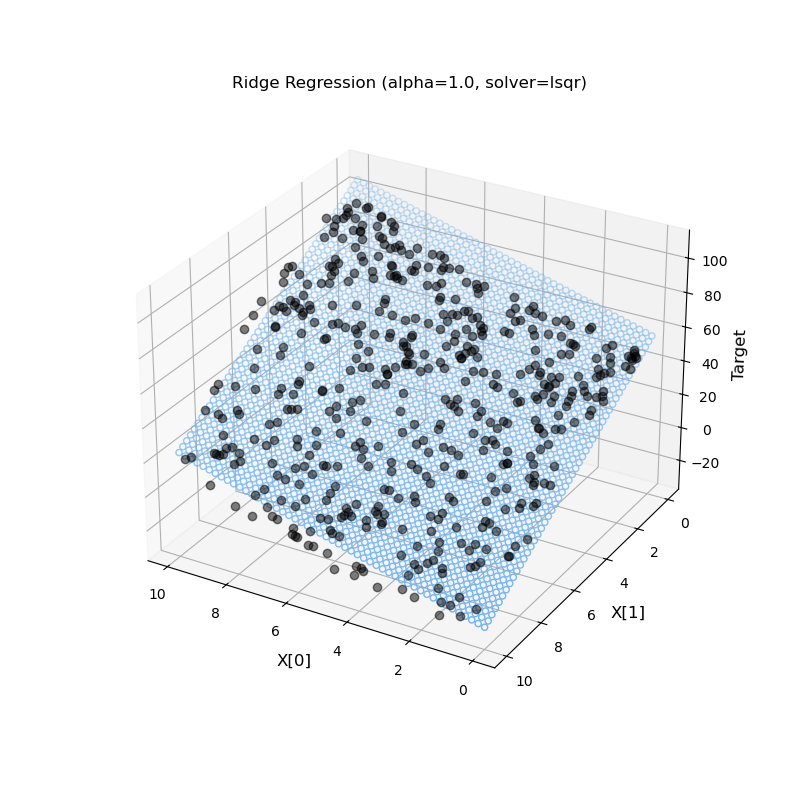

RidgeCV best alpha: 1.0
Does RidgeCV agree with GridSearchCV? Yes


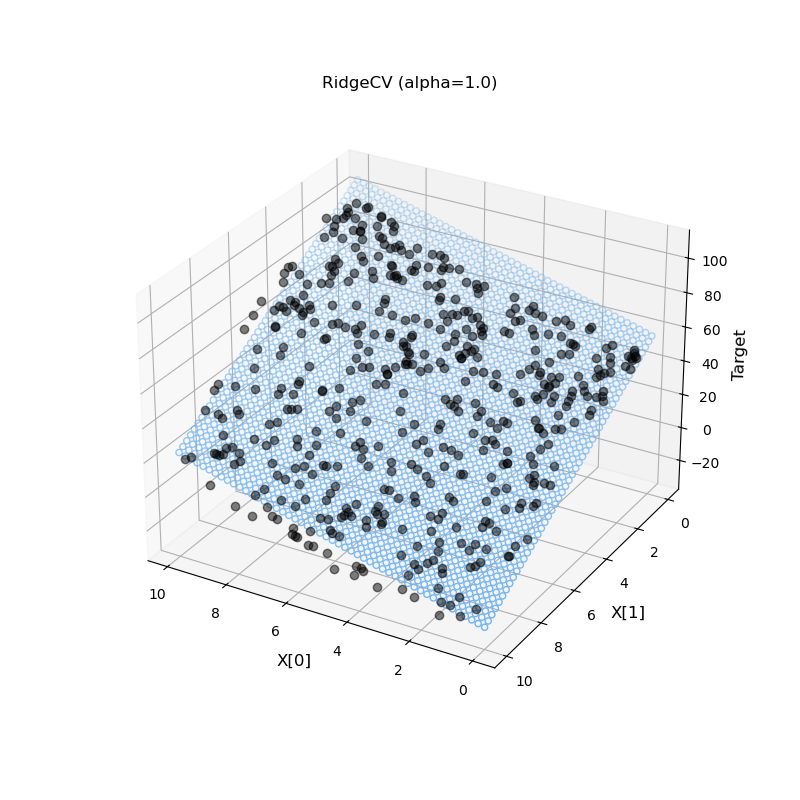

In [15]:
ridge_params = {'alpha': [0.05, 0.1, 0.2, 0.5, 1.0], 'solver': ['svd', 'lsqr']}
ridge = Ridge()
grid_search = GridSearchCV(
    ridge, 
    ridge_params, 
    cv=5,
    scoring='neg_mean_squared_error' 
)
grid_search.fit(X, y, sample_weight=1/yerr**2)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_ridge = Ridge(**grid_search.best_params_)
best_ridge.fit(X, y, sample_weight=1/yerr**2)

%matplotlib widget

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], y, color='k',
        zorder=15, linestyle='none',
        marker='o', alpha=0.5)
ax.scatter(feature1_mesh.flatten(), feature2_mesh.flatten(), y_grid.flatten(),
           facecolor=(0,0,0,0), s=20,
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title(f'Ridge Regression (alpha={best_ridge.alpha}, solver={best_ridge.solver})', fontsize=12)
ax.view_init(elev=28, azim=120)
plt.show()

%matplotlib inline
alphas = np.array([0.05, 0.1, 0.2, 0.5, 1.0])
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X, y, sample_weight=1/yerr**2)
print("RidgeCV best alpha:", ridge_cv.alpha_)
print("Does RidgeCV agree with GridSearchCV?", 
      "Yes" if ridge_cv.alpha_ == grid_search.best_params_['alpha'] else "No")

%matplotlib widget

y_grid_cv = ridge_cv.predict(X_grid)
y_grid_cv = y_grid_cv.reshape(feature1_mesh.shape)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], y, color='k',
        zorder=15, linestyle='none',
        marker='o', alpha=0.5)
ax.scatter(feature1_mesh.flatten(), feature2_mesh.flatten(), y_grid_cv.flatten(),
           facecolor=(0,0,0,0), s=20,
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title(f'RidgeCV (alpha={ridge_cv.alpha_})', fontsize=12)
ax.view_init(elev=28, azim=120)
plt.show()

%matplotlib inline


C:\Users\kdcow\miniconda3\envs\astr3300\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


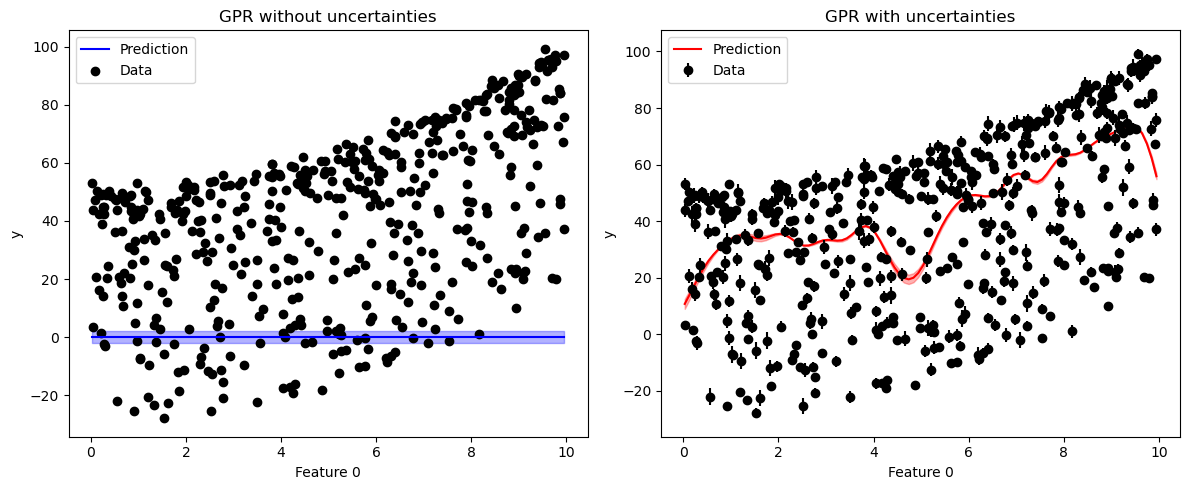

In [30]:
#Part 5
%matplotlib inline
from sklearn.gaussian_process import GaussianProcessRegressor, kernels

x_pred = np.column_stack([feature1_grid, np.ones_like(feature1_grid) * feature2_mean])

kernel = kernels.RBF(length_scale=1.0)
gp_without_uncertainty = GaussianProcessRegressor(kernel=kernel, random_state=0)
gp_without_uncertainty.fit(X, y)
y_pred_without, y_std_without = gp_without_uncertainty.predict(x_pred, return_std=True)

gp_with_uncertainty = GaussianProcessRegressor(kernel=kernel,
                                              alpha=(yerr/y)**2,
                                              random_state=0)
gp_with_uncertainty.fit(X, y)
y_pred_with, y_std_with = gp_with_uncertainty.predict(x_pred, return_std=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(feature1_grid, y_pred_without, '-', color='blue', label='Prediction')
ax1.fill_between(feature1_grid,
                y_pred_without - 2 * y_std_without,
                y_pred_without + 2 * y_std_without,
                color='blue', alpha=0.3)
ax1.scatter(X[:, 0], y, color='black', label='Data')
ax1.set_title('GPR without uncertainties')
ax1.set_xlabel('Feature 0')
ax1.set_ylabel('y')
ax1.legend()

ax2.plot(feature1_grid, y_pred_with, '-', color='red', label='Prediction')
ax2.fill_between(feature1_grid,
                y_pred_with - 2 * y_std_with,
                y_pred_with + 2 * y_std_with,
                color='red', alpha=0.3)
ax2.errorbar(X[:, 0], y, yerr=yerr, fmt='o', color='black', label='Data')
ax2.set_title('GPR with uncertainties')
ax2.set_xlabel('Feature 0')
ax2.set_ylabel('y')
ax2.legend()

plt.tight_layout()
plt.show()

Polynomial coefficients (degree 4):
[ 5.00363666e+01  3.26437755e-01  7.04566290e-02  3.76478281e-01
 -2.37398556e-02 -8.70986046e-01  1.19122182e-02  2.54637597e-02
 -1.32002013e-02  2.02705370e-02 -4.53796076e-04 -5.21142180e-04
 -2.06194460e-03  1.68744189e-03 -1.52054198e-03]


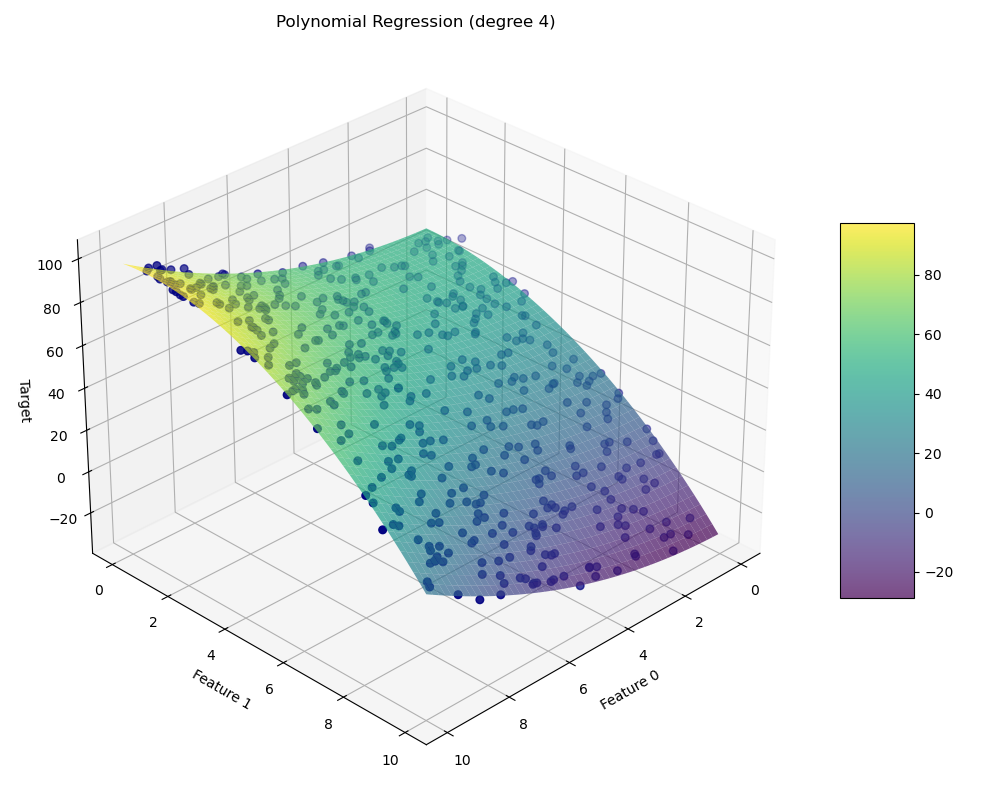

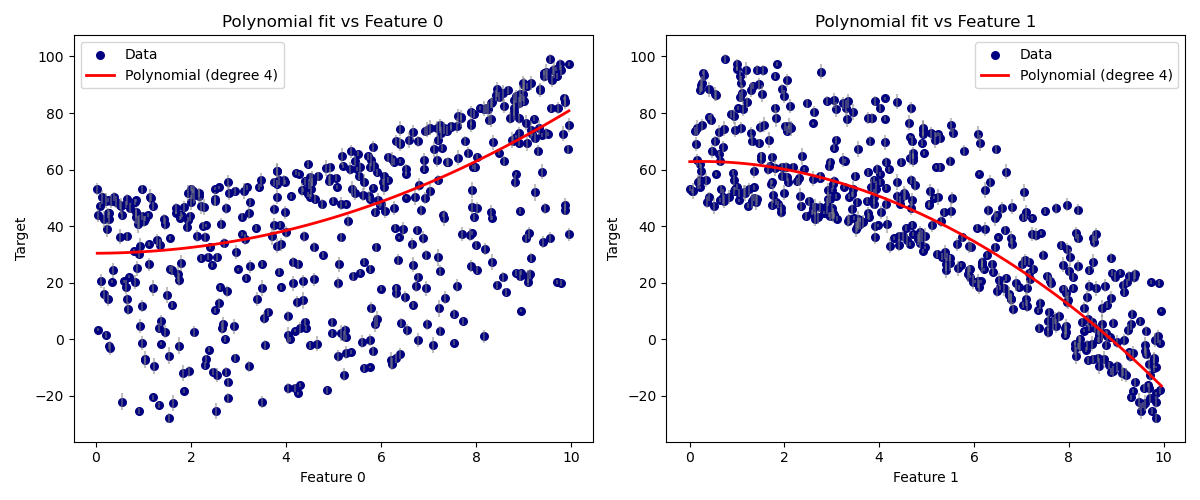

In [27]:
#Part 6
from astroML.linear_model import PolynomialRegression

degree = 4
poly = PolynomialRegression(degree)
poly.fit(X, y)

print(f"Polynomial coefficients (degree {degree}):")
print(poly.coef_)

X_grid = np.column_stack((feature1_mesh.flatten(), feature2_mesh.flatten()))

y_grid = poly.predict(X_grid)
y_grid = y_grid.reshape(feature1_mesh.shape)

%matplotlib widget
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, color='navy', s=30, marker='o', label='Data points')

surf = ax.plot_surface(feature1_mesh, feature2_mesh, y_grid, 
                      alpha=0.7, cmap='viridis', linewidth=0, antialiased=True)

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Target')
ax.set_title(f'Polynomial Regression (degree {degree})')
ax.view_init(elev=30, azim=45)

plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

feature2_mean = np.mean(X[:, 1])
X_pred1 = np.column_stack((feature1_grid, np.ones_like(feature1_grid) * feature2_mean))
y_pred1 = poly.predict(X_pred1)

ax1.scatter(X[:, 0], y, color='navy', s=30, label='Data')
ax1.errorbar(X[:, 0], y, yerr=yerr, fmt='none', ecolor='gray', alpha=0.5)
ax1.plot(feature1_grid, y_pred1, 'r-', linewidth=2, label=f'Polynomial (degree {degree})')
ax1.set_xlabel('Feature 0')
ax1.set_ylabel('Target')
ax1.set_title('Polynomial fit vs Feature 0')
ax1.legend()

feature1_mean = np.mean(X[:, 0])
X_pred2 = np.column_stack((np.ones_like(feature2_grid) * feature1_mean, feature2_grid))
y_pred2 = poly.predict(X_pred2)

ax2.scatter(X[:, 1], y, color='navy', s=30, label='Data')
ax2.errorbar(X[:, 1], y, yerr=yerr, fmt='none', ecolor='gray', alpha=0.5)
ax2.plot(feature2_grid, y_pred2, 'r-', linewidth=2, label=f'Polynomial (degree {degree})')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Target')
ax2.set_title('Polynomial fit vs Feature 1')
ax2.legend()

plt.tight_layout()
plt.show()

#I was having a lot of trouble with this one. I did use AI to help with the errors. 

Degree 1: Train RMSE = 7.7981, CV RMSE = 7.4923, BIC = 335.3672
Degree 2: Train RMSE = 1.8686, CV RMSE = 1.9519, BIC = 128.9151
Degree 3: Train RMSE = 1.8535, CV RMSE = 1.9483, BIC = 137.3901
Degree 4: Train RMSE = 1.8249, CV RMSE = 2.0085, BIC = 151.0212
Degree 5: Train RMSE = 1.8047, CV RMSE = 2.0198, BIC = 160.6845
Degree 6: Train RMSE = 1.7868, CV RMSE = 2.0775, BIC = 173.9539
Degree 7: Train RMSE = 1.7804, CV RMSE = 2.0631, BIC = 181.6031
Degree 8: Train RMSE = 1.7614, CV RMSE = 2.1454, BIC = 196.6292
Degree 9: Train RMSE = 1.7217, CV RMSE = 2.1255, BIC = 203.8971
Degree 10: Train RMSE = 1.7021, CV RMSE = 2.1367, BIC = 213.5044


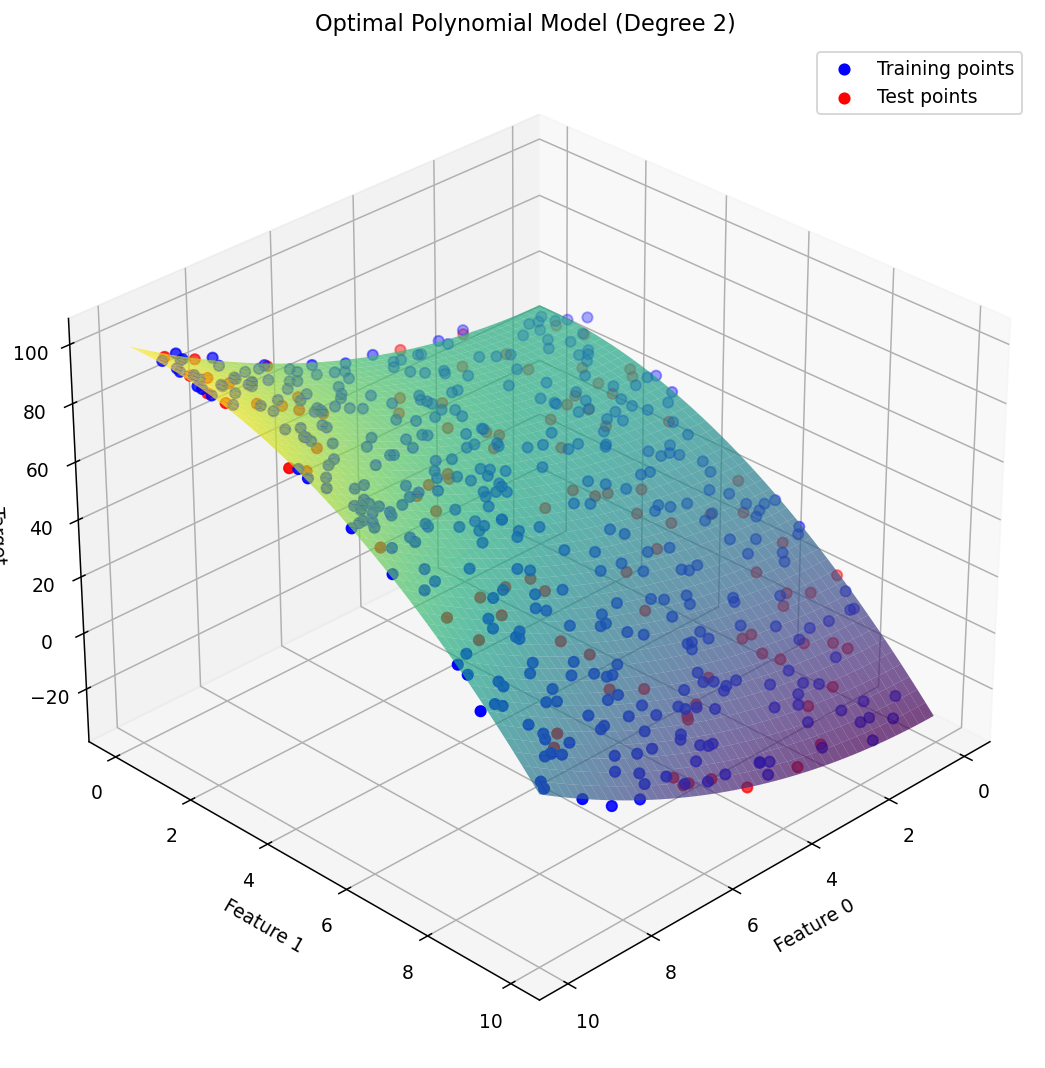

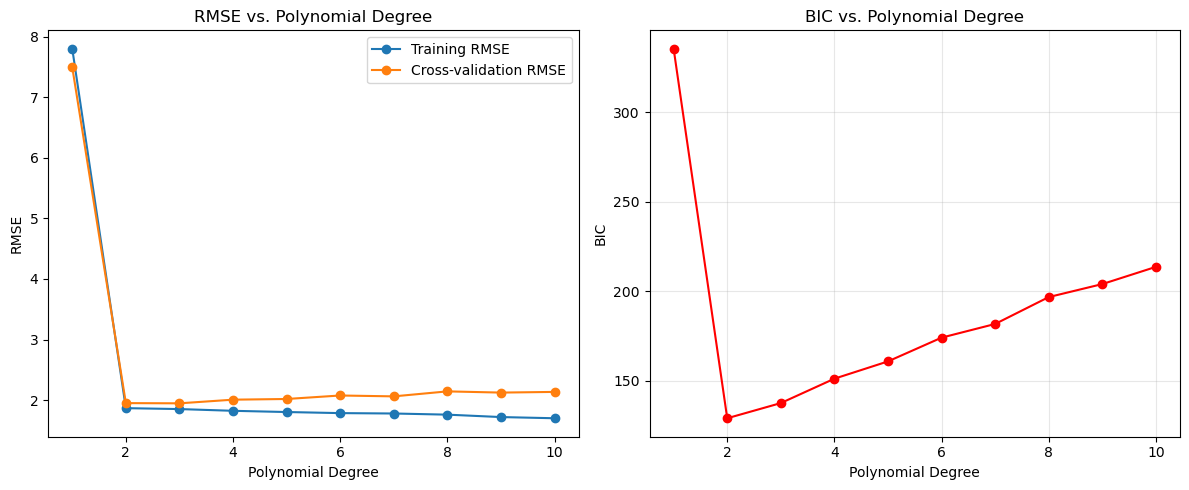

Optimal polynomial degree based on BIC: 2
Test RMSE with optimal degree 2: 1.9784


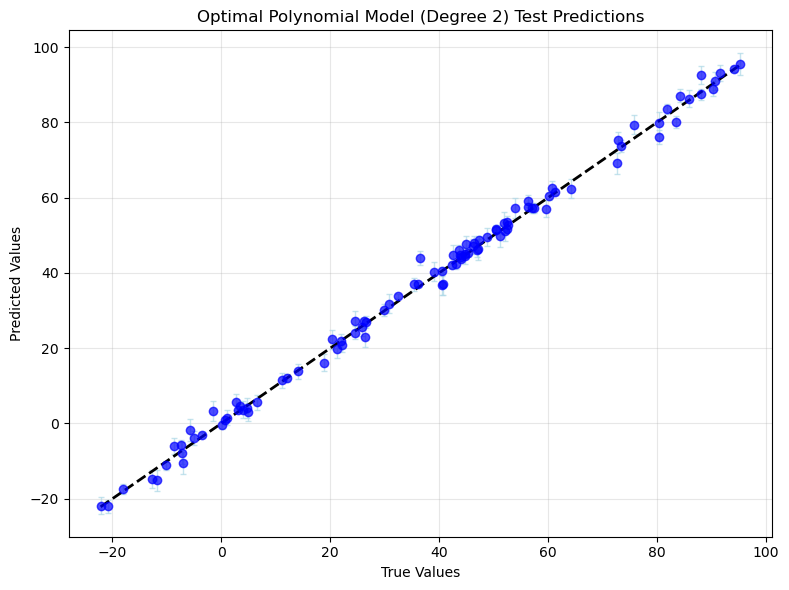

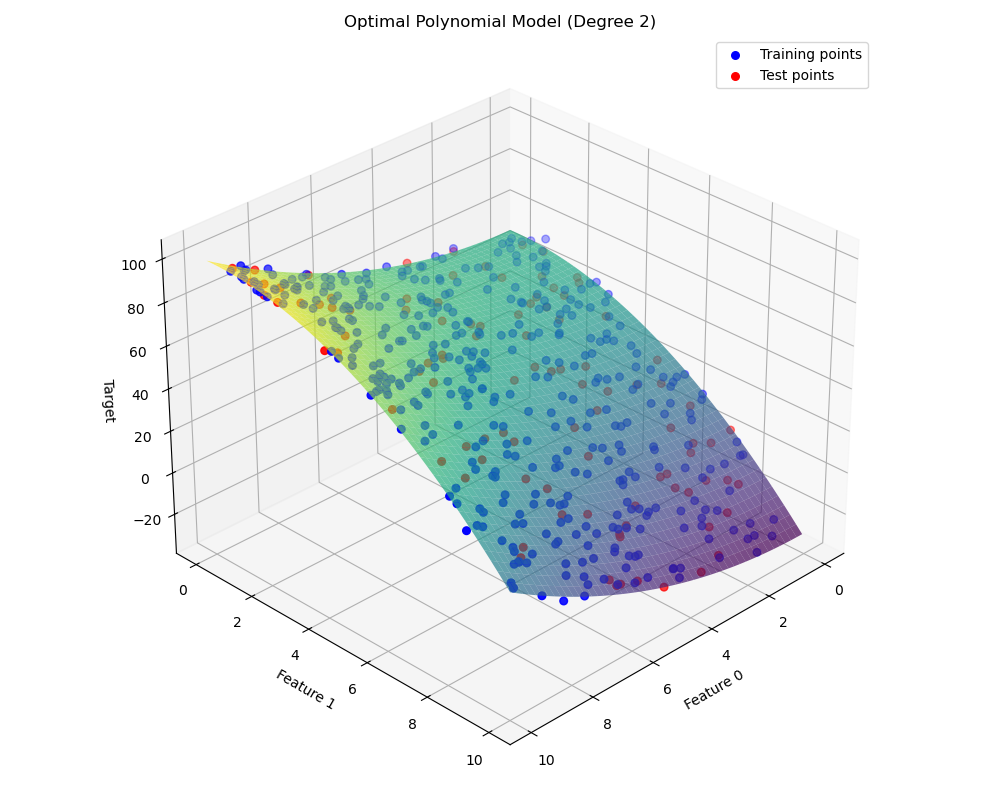

In [35]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train_full, X_test, y_train_full, y_test, yerr_train_full, yerr_test = train_test_split(
    X, y, yerr, test_size=0.2, random_state=42)

X_train, X_cv, y_train, y_cv, yerr_train, yerr_cv = train_test_split(
    X_train_full, y_train_full, yerr_train_full, test_size=0.2, random_state=42)

def compute_bic(n_samples, mse, n_params):
    return n_samples * np.log(mse) + n_params * np.log(n_samples)

degrees = range(1, 11)  
train_errors = []
cv_errors = []
bic_values = []

for degree in degrees:
    poly = PolynomialRegression(degree)
    poly.fit(X_train, y_train)
    y_train_pred = poly.predict(X_train)
    y_cv_pred = poly.predict(X_cv)
    train_mse = mean_squared_error(y_train, y_train_pred)
    cv_mse = mean_squared_error(y_cv, y_cv_pred)
    train_rmse = np.sqrt(train_mse)
    cv_rmse = np.sqrt(cv_mse)
    train_errors.append(train_rmse)
    cv_errors.append(cv_rmse)
    n_params = degree * X.shape[1] + 1
    bic = compute_bic(len(y_cv), cv_mse, n_params)
    bic_values.append(bic)
    
    print(f"Degree {degree}: Train RMSE = {train_rmse:.4f}, CV RMSE = {cv_rmse:.4f}, BIC = {bic:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, train_errors, 'o-', label='Training RMSE')
plt.plot(degrees, cv_errors, 'o-', label='Cross-validation RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs. Polynomial Degree')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(degrees, bic_values, 'o-', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('BIC')
plt.title('BIC vs. Polynomial Degree')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

optimal_degree = degrees[np.argmin(bic_values)]
print(f"Optimal polynomial degree based on BIC: {optimal_degree}")

optimal_poly = PolynomialRegression(optimal_degree)
optimal_poly.fit(X_train_full, y_train_full)

y_test_pred = optimal_poly.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE with optimal degree {optimal_degree}: {test_rmse:.4f}")

plt.figure(figsize=(8, 6))
plt.errorbar(y_test, y_test_pred, yerr=yerr_test, fmt='o', color='blue', 
             ecolor='lightblue', elinewidth=1, capsize=2, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Optimal Polynomial Model (Degree {optimal_degree}) Test Predictions')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

y_grid_optimal = optimal_poly.predict(X_grid).reshape(feature1_mesh.shape)

%matplotlib widget
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_full[:, 0], X_train_full[:, 1], y_train_full, 
           color='blue', s=30, label='Training points')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, 
           color='red', s=30, label='Test points')
surf = ax.plot_surface(feature1_mesh, feature2_mesh, y_grid_optimal, 
                      alpha=0.7, cmap='viridis', linewidth=0, antialiased=True)

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Target')
ax.set_title(f'Optimal Polynomial Model (Degree {optimal_degree})')
ax.legend()
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

#I used AI to help with this part as well. 

<span style="color:green"> NP: Correct! Good Job! </span>